# Answering the Science Question
The science question for my model is: **Do monsoon seasons (in the Philippines) affect salinity levels differently during El Niño years compared to La Niña years?**

First, import packages to re-create and visualize the model fields here:

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

Next, define the location of the project directory for the model:

In [2]:
# define the input directory
project_dir = 'C:\\Users\\andre\\OneDrive\\Desktop\\Classwork\\cs185c\\project'

Then, re-create the model grid

In [3]:
delX = 1/12
delY = 1/12
xgOrigin = 110
ygOrigin = 3
n_rows = 204
n_cols = 300

# recreate the grids that will be used in the model
xc = np.arange(xgOrigin+delX/2, xgOrigin+n_cols*delX, delX)
yc = np.arange(ygOrigin+delY/2, ygOrigin+n_rows*delY, delY)
XC, YC = np.meshgrid(xc, yc)

## Plot a model field at one timestep
To assess the salinity differences spatially, I'll plot the differences between the model results for 1997 and 1998. I'll choose one field near the end of my simulation:

In [4]:
# read in the grid for 1997
grid_1997 = np.fromfile(os.path.join(project_dir,'run', '1997','diags',
                                     'TS_surf_daily_mean',
                                     'TS_surf_daily_mean.0000056736.data'), '>f4')
grid_1997 = grid_1997.reshape((2,n_rows,n_cols))

# read in the grid for 1998
grid_1998 = np.fromfile(os.path.join(project_dir,'run', '1998', 'diags',
                                     'TS_surf_daily_mean',
                                     'TS_surf_daily_mean.0000056736.data'), '>f4')
grid_1998 = grid_1998.reshape((2,n_rows,n_cols))

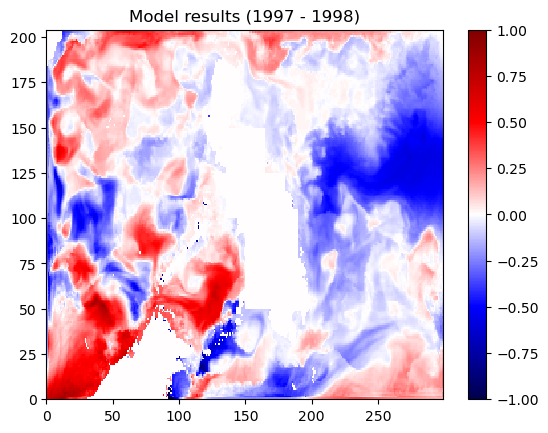

In [11]:
# plot the differences
C = plt.pcolormesh(grid_1997[1,:,:-1]-grid_1998[1,:,:-1],
                   cmap='seismic',vmin=-1, vmax=1)
plt.colorbar(C)
plt.title('Model results (1997 - 1998)')
plt.show()

In this graph, the differences in salinity levels between 1997 (red/El Nino) and 1998 (blue/La Nina) are shown.
We can see that at the current timestep shown (June-July), salinity is higher for El Nino years in the South China Sea while on the other side, salinity is higher in La Nina years on the Pacific Ocean.

## Make a timeseries
Next we can see how the differences between the models is evolving through time. For this example, I'll choose a point in the domain near the coast as in my previous notebook:

In [28]:
row = 125
col = 200

Next, I'll define a quick function to convert my iteration numbers to date and time information.

In [29]:
def iter_number_to_date(iter_number,seconds_per_iter=300):
    total_seconds = iter_number*seconds_per_iter
    date = datetime(1997,1,15) + timedelta(seconds=total_seconds)
    return(date)

Then, I'll loop through all of the output files to generate a timeseries:

In [30]:
timestep_dates = []
theta_1997_values = []
theta_1998_values = []
for file_name in sorted(os.listdir(os.path.join(project_dir,'run', '1998','diags','TS_surf_daily_mean'))):
    if file_name[-4:]=='data':
        # get the timestep number
        timestep_number = int(file_name.split('.')[-2])
        timestep_dates.append(iter_number_to_date(timestep_number))

        # read in the grid with the wind
        grid_1997 = np.fromfile(os.path.join(project_dir,'run', '1997','diags',
                                             'TS_surf_daily_mean',
                                             file_name), '>f4')
        grid_1997 = grid_1997.reshape((2,n_rows,n_cols))
        
        # read in the grid without the wind
        grid_1998 = np.fromfile(os.path.join(project_dir,'run', '1998','diags',
                                             'TS_surf_daily_mean',
                                             file_name), '>f4')
        grid_1998 = grid_1998.reshape((2,n_rows,n_cols))

        theta_1997_values.append(grid_1997[1,row,col])
        theta_1998_values.append(grid_1998[1,row,col])

Finally, I'll plot the timeseries to see the comparison:

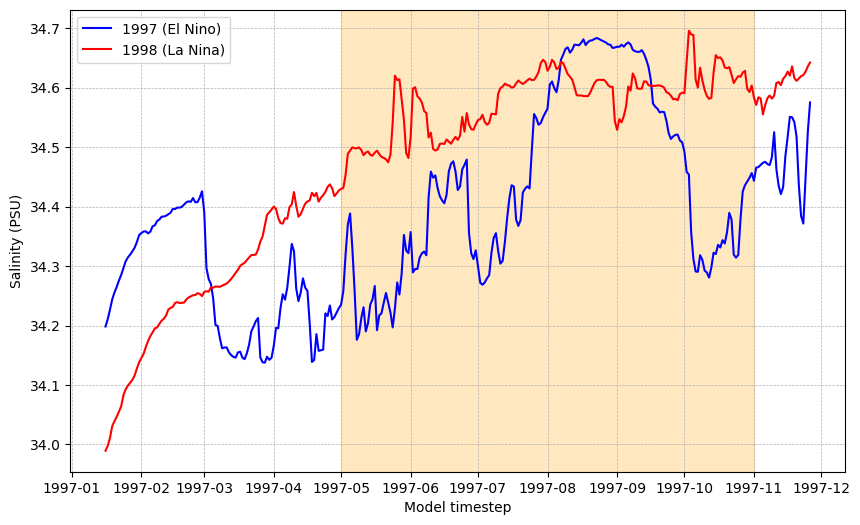

In [31]:
plt.figure(figsize=(10, 6))
plt.plot(timestep_dates, theta_1997_values,'b-',label='1997 (El Nino)')
plt.plot(timestep_dates, theta_1998_values,'r-',label='1998 (La Nina)')
plt.ylabel('Salinity (PSU)')
plt.xlabel('Model timestep')
plt.axvspan(datetime(1997,5,1), datetime(1997,11,1), color='orange', alpha=0.25)
plt.legend()
plt.grid(linestyle='--',linewidth=0.5)
plt.show()

During the Monsoon season (May-October) in the Philippines, we see that El Nino years (1997) have lower salinity levels on average compared to La Nina years.